<h1>EDA and Visualization</h1>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr

<h3>Load Cleaned Dataset for Analysis</h3>

In [46]:
file_path = "cleaned_dataset_for_analysis.csv"  
df = pd.read_csv(file_path)

<h3>Create folder for saving plots</h3>

In [47]:
os.makedirs("plots", exist_ok=True)

<h3>Initial Data Inspection</h3>

In [48]:
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          5850 non-null   int64  
 1   Districts                     5850 non-null   object 
 2   Area                          5850 non-null   float64
 3   yield_kg/ha                   5850 non-null   float64
 4   crop_type                     5850 non-null   object 
 5   avg_temp_C                    5850 non-null   float64
 6   max_temp_C                    5850 non-null   float64
 7   min_temp_C                    5850 non-null   float64
 8   avg_relative_humidity         5850 non-null   float64
 9   avg_rainfall_mm_per_year      5850 non-null   float64
 10  total_solar_radiation_kWh/m2  5850 non-null   float64
 11  total_PAR_MJ/m2               5850 non-null   float64
 12  avg_wind_speed_m/s            5850 non-null   float64
 13  avg

<h3>Summary Statistics</h3>

In [49]:
summary = df.describe()
summary.to_csv("plots/summary_statistics.csv")  
print("Summary statistics saved.")

Summary statistics saved.


<h3>Crop Distribution</h3>

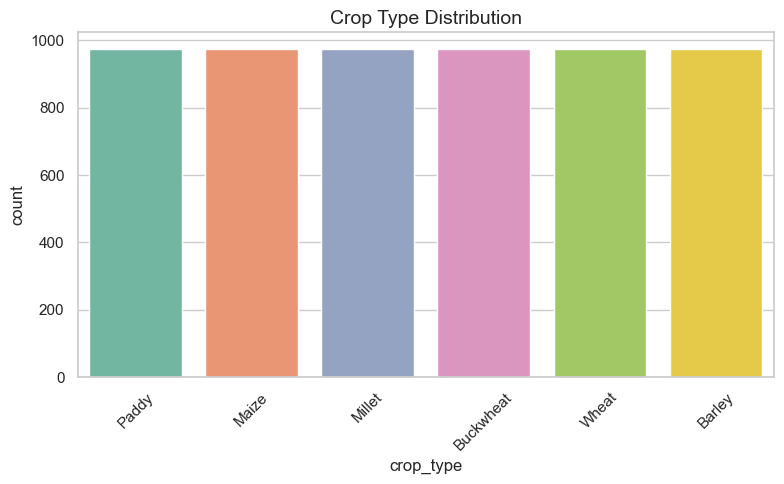

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(x='crop_type', data=df, palette='Set2')
plt.title('Crop Type Distribution', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/crop_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Yield Distribution by Crop</h3>

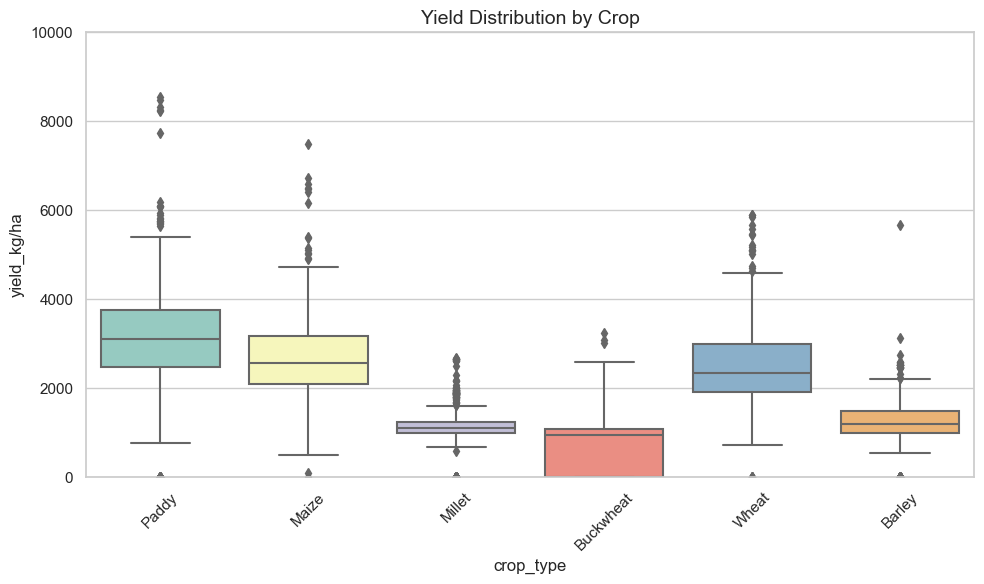

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop_type', y='yield_kg/ha', data=df, palette='Set3')

plt.title('Yield Distribution by Crop', fontsize=14)
plt.xticks(rotation=45)

plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))

plt.tight_layout()
plt.savefig("plots/yield_distribution_by_crop.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Yearly Yield Trend for Each Crop</h3>

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


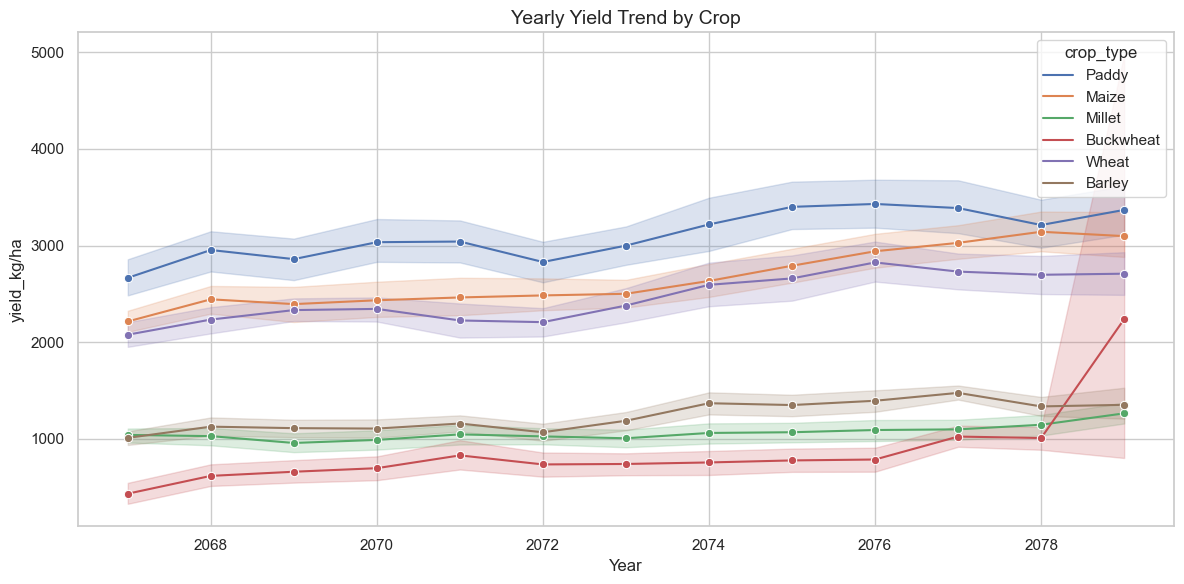

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='yield_kg/ha', hue='crop_type', marker='o')
plt.title('Yearly Yield Trend by Crop', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/yearly_yield_trend.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Correlation Heatmap (Climate + Yield)</h3>

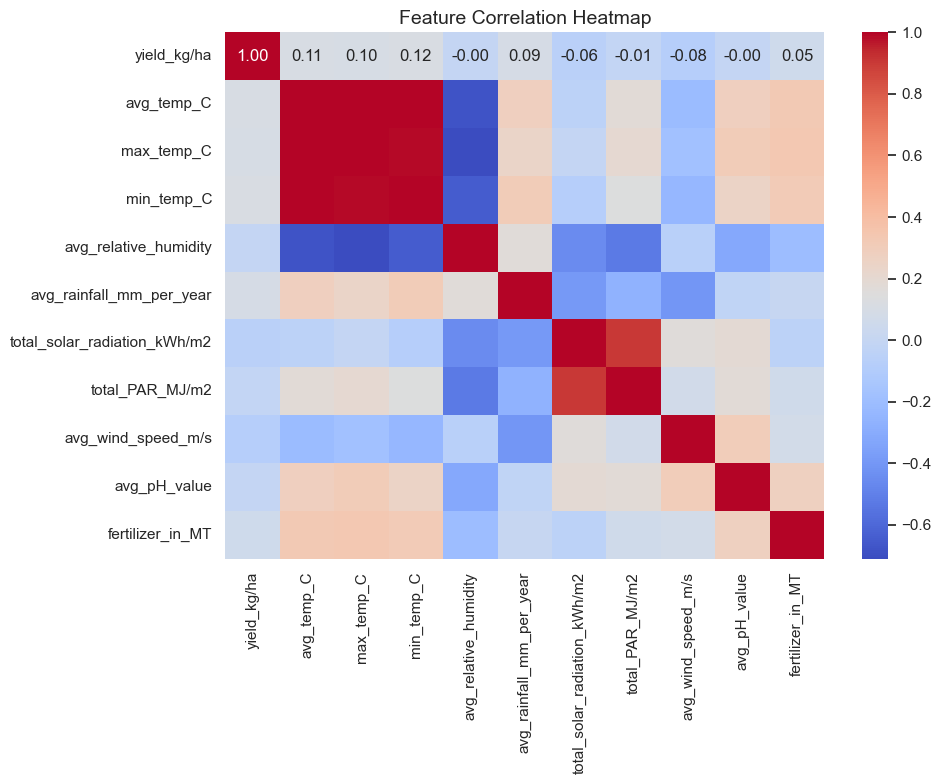

In [53]:
numeric_cols = [
    'yield_kg/ha',
    'avg_temp_C',
    'max_temp_C',
    'min_temp_C',
    'avg_relative_humidity',
    'avg_rainfall_mm_per_year',
    'total_solar_radiation_kWh/m2',
    'total_PAR_MJ/m2',
    'avg_wind_speed_m/s',
    'avg_pH_value',
    'fertilizer_in_MT'
]
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Calculate correlations with yield</h3>

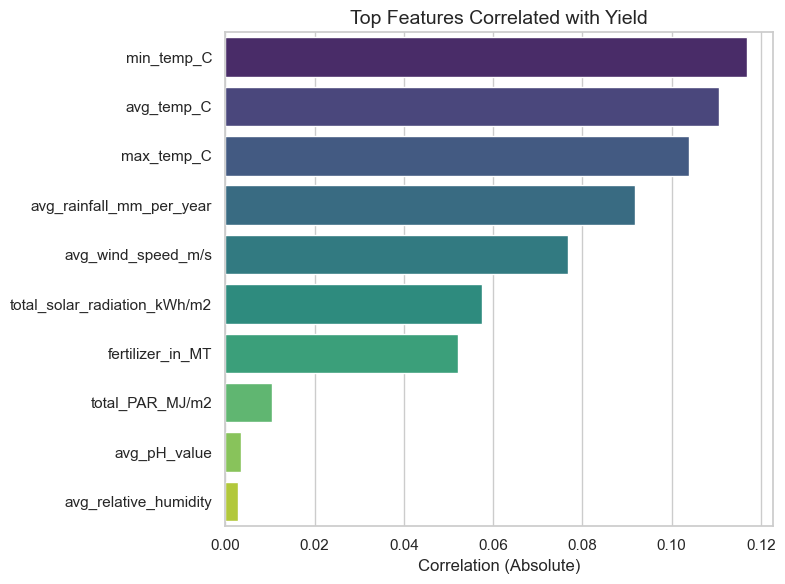

In [54]:
target = 'yield_kg/ha'
corr_with_yield = corr[target].drop(target).abs().sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_yield.values, y=corr_with_yield.index, palette="viridis")
plt.title('Top Features Correlated with Yield', fontsize=14)
plt.xlabel('Correlation (Absolute)')
plt.tight_layout()
plt.savefig("plots/top_correlated_features_with_yield.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Correlation with Significance (Pearson & Spearman) eith target column and numeric columns</h3>

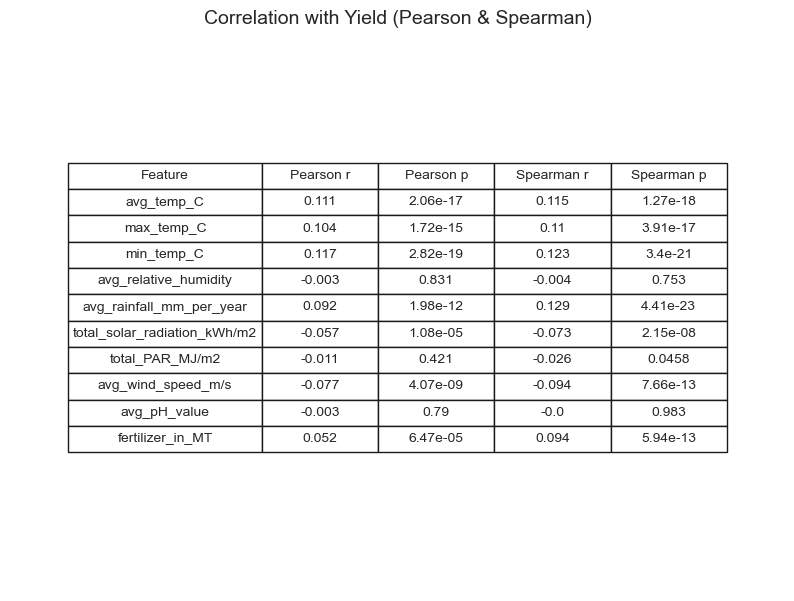

In [62]:
target = 'yield_kg/ha'

# Compute correlations
results = []
for col in numeric_cols:
    if col != target:
        pearson_r, pearson_p = pearsonr(df[target], df[col])
        spearman_r, spearman_p = spearmanr(df[target], df[col])
        results.append({
            'Feature': col,
            'Pearson r': round(pearson_r, 3),
            'Pearson p': f"{pearson_p:.3g}",
            'Spearman r': round(spearman_r, 3),
            'Spearman p': f"{spearman_p:.3g}"
        })

correlation_df = pd.DataFrame(results)

# Plot table
fig, ax = plt.subplots(figsize=(10, len(correlation_df) * 0.6 + 1))
ax.axis('off')

table = ax.table(
    cellText=correlation_df.values,
    colLabels=correlation_df.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Adjust column widths
col_widths = [0.25, 0.15, 0.15, 0.15, 0.15]
for i, width in enumerate(col_widths):
    for key, cell in table.get_celld().items():
        if key[1] == i:
            cell.set_width(width)

# Add title very close to table
ax.set_title('Correlation with Yield (Pearson & Spearman)', fontsize=14, pad=0)  # pad=0 removes extra gap
ax.title.set_position((0.5, 1.02))  # Push title closer to the table

# Remove any extra padding
plt.subplots_adjust(top=0.92)

plt.savefig("plots/correlation_significance_table.png", dpi=300, bbox_inches='tight')
plt.show()

# Save as CSV
correlation_df.to_csv("plots/correlation_significance_table.csv", index=False)

<h3>Relationship: Rainfall vs Yield</h3>

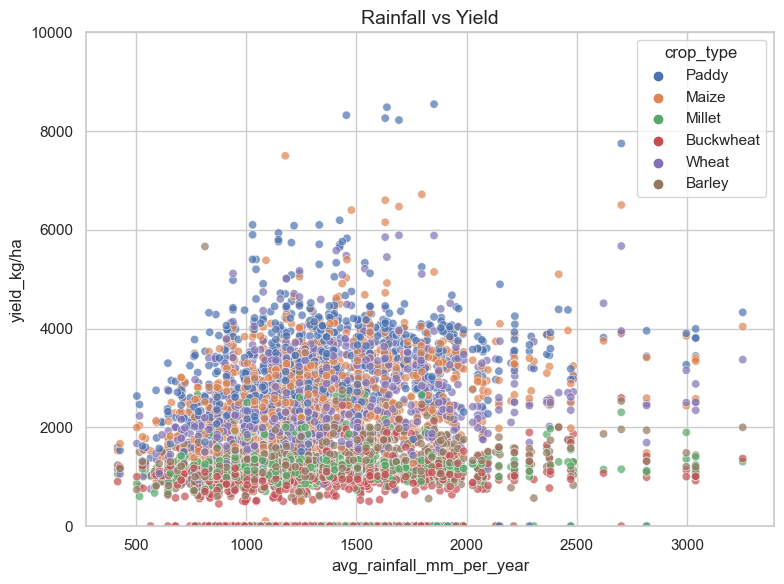

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_rainfall_mm_per_year', y='yield_kg/ha', hue='crop_type', alpha=0.7)
plt.title('Rainfall vs Yield', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.tight_layout()
plt.savefig("plots/rainfall_vs_yield.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Relationship: Fertilizer vs Yield</h3>

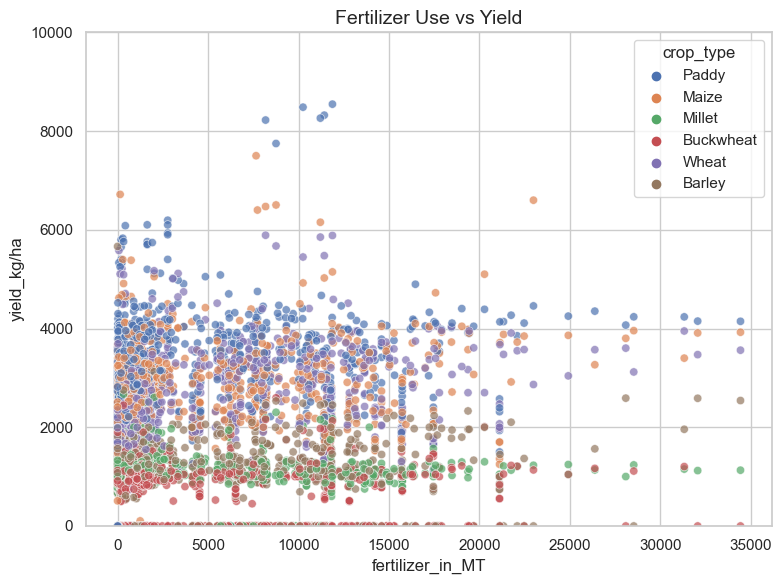

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fertilizer_in_MT', y='yield_kg/ha', hue='crop_type', alpha=0.7)
plt.title('Fertilizer Use vs Yield', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.tight_layout()
plt.savefig("plots/fertilizer_vs_yield.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Relationship: Average Rainfall vs Yield</h3>

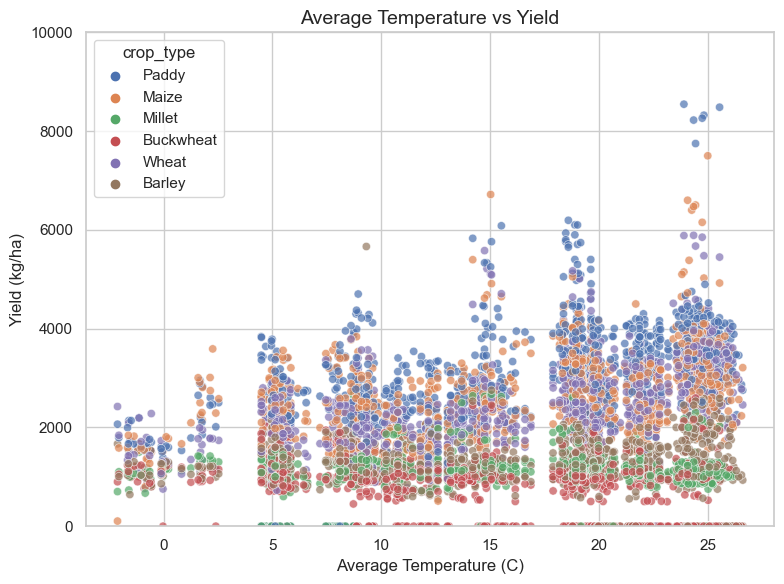

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_temp_C', y='yield_kg/ha', hue='crop_type', alpha=0.7)
plt.title('Average Temperature vs Yield', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.xlabel('Average Temperature (C)')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.savefig("plots/temperature_vs_yield.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Yield Trend Over Time by Crop</h3>

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


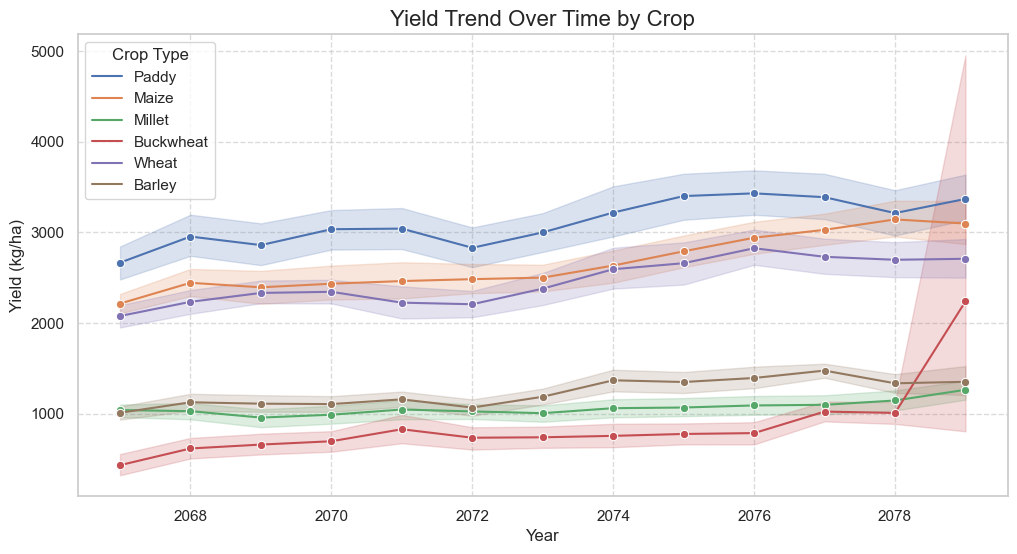

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='yield_kg/ha', hue='crop_type', marker='o')
plt.title('Yield Trend Over Time by Crop', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.legend(title='Crop Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("plots/yield_trend_by_crop.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Regression Plots for Key Features like Fertilizer, Rainfall, Average Temperature, Soil pH vs yield</h3>

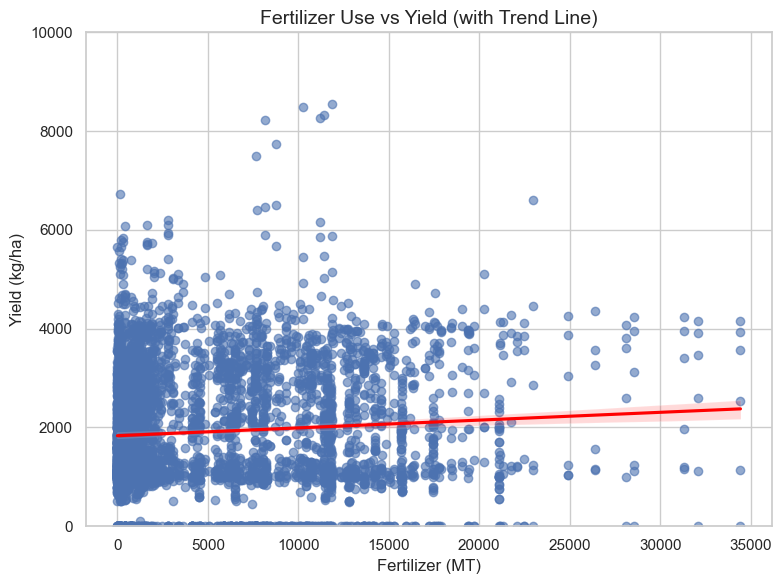

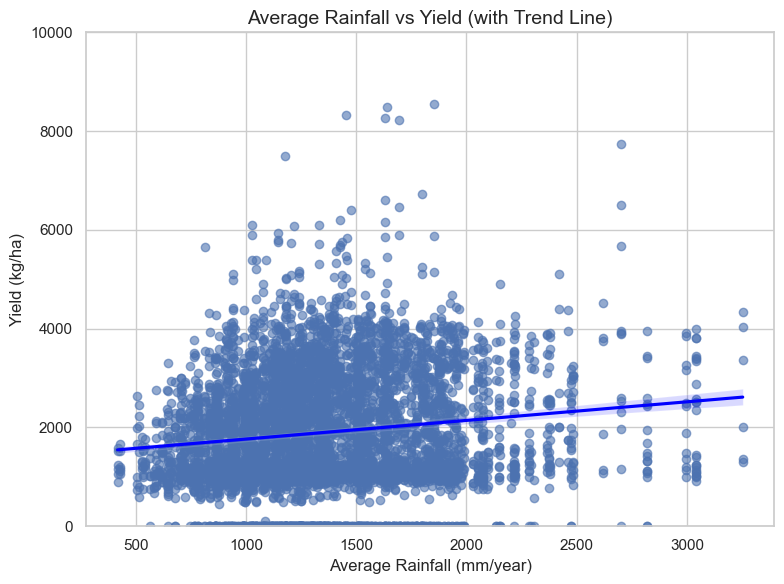

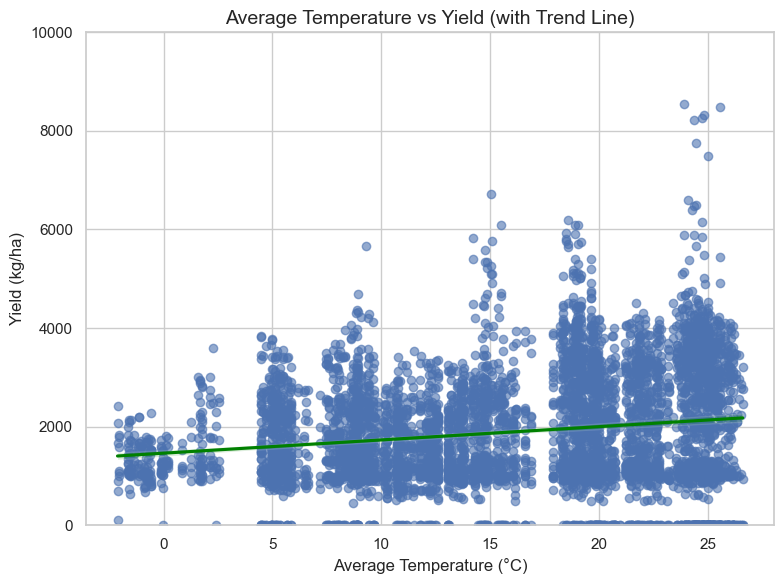

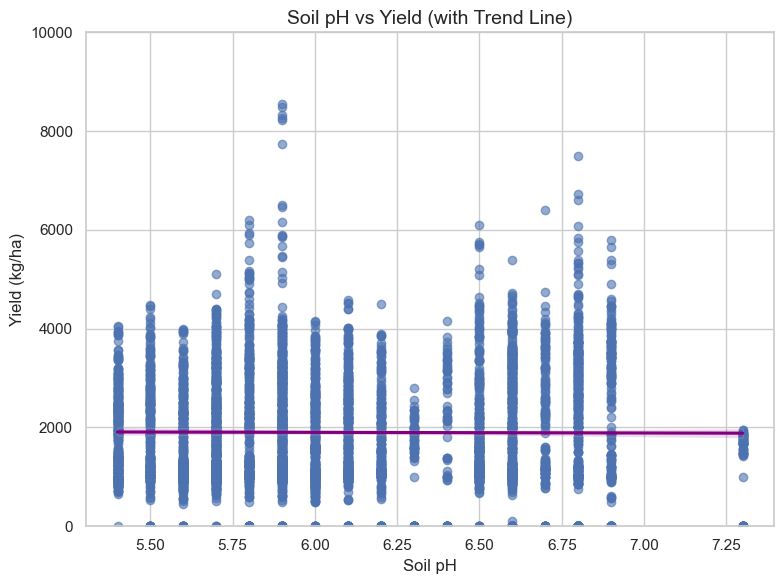

In [63]:
# Set style for consistency
sns.set(style="whitegrid")

# 1. Fertilizer vs Yield
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='fertilizer_in_MT', y='yield_kg/ha', scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title('Fertilizer Use vs Yield (with Trend Line)', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.xlabel('Fertilizer (MT)')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.savefig("plots/fertilizer_vs_yield_regression.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Rainfall vs Yield
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='avg_rainfall_mm_per_year', y='yield_kg/ha', scatter_kws={'alpha': 0.6}, line_kws={"color": "blue"})
plt.title('Average Rainfall vs Yield (with Trend Line)', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.savefig("plots/rainfall_vs_yield_regression.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Average Temperature vs Yield
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='avg_temp_C', y='yield_kg/ha', scatter_kws={'alpha': 0.6}, line_kws={"color": "green"})
plt.title('Average Temperature vs Yield (with Trend Line)', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.savefig("plots/temperature_vs_yield_regression.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Soil pH vs Yield
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='avg_pH_value', y='yield_kg/ha', scatter_kws={'alpha': 0.6}, line_kws={"color": "purple"})
plt.title('Soil pH vs Yield (with Trend Line)', fontsize=14)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2000))
plt.xlabel('Soil pH')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.savefig("plots/pH_vs_yield_regression.png", dpi=300, bbox_inches='tight')
plt.show()